# Convolutional Neural Networks with Keras
## Mnist Dataset

In [1]:
import numpy as np
import pandas as np

import matplotlib.pyplot as plt
%matplotlib inline

Load the data

In [2]:
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

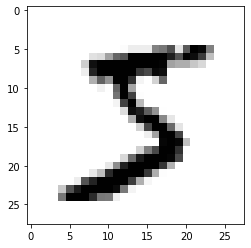

In [4]:
single_image = X_train[0]
plt.imshow(single_image,cmap = 'binary')

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
from tensorflow.keras.utils import to_categorical
y_example = to_categorical(y_train)
y_example.shape

(60000, 10)

In [7]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [8]:
y_cat_test = to_categorical(y_test,num_classes = 10)
y_cat_train = to_categorical(y_train,num_classes = 10)

In [9]:
X_train = X_train/255
X_test = X_test/255

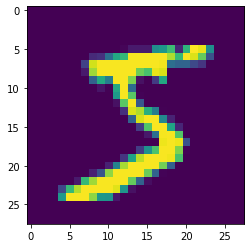

In [10]:
plt.imshow(X_train[0])

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
# batch size, width,height,color channels
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_test.shape

(10000, 28, 28, 1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [14]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size = (4,4),
                input_shape = (X_train.shape[1],X_train.shape[2],1),
                activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

#Output --
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [16]:
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1441 - accuracy: 0.9563 - val_loss: 0.0599 - val_accuracy: 0.9802
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0500 - accuracy: 0.9850 - val_loss: 0.0461 - val_accuracy: 0.9850
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0383 - val_accuracy: 0.9882
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0217 - accuracy: 0.9931 - val_loss: 0.0356 - val_accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0405 - val_accuracy: 0.9875


       loss  accuracy  val_loss  val_accuracy
0  0.144111  0.956267  0.059905        0.9802
1  0.049963  0.984967  0.046115        0.9850
2  0.031652  0.990083  0.038323        0.9882
3  0.021746  0.993100  0.035596        0.9887
4  0.014509  0.995350  0.040538        0.9875


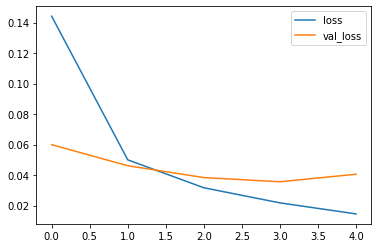

In [17]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()
print(metrics)

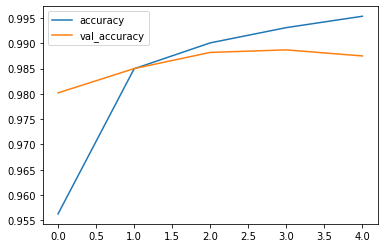

In [18]:
metrics[['accuracy','val_accuracy']].plot()

In [19]:
model.metrics_names

['loss', 'accuracy']

In [20]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.04053833335638046, 0.987500011920929]

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       1.00      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg    

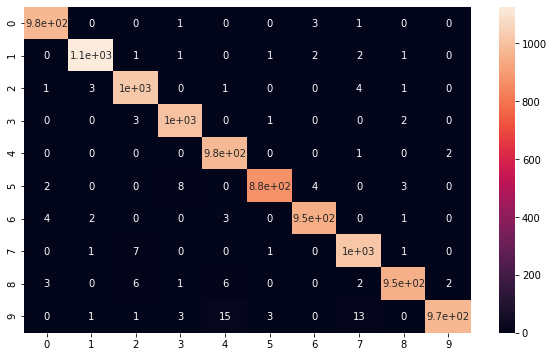

In [23]:
matr = confusion_matrix(y_test,predictions)
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(matr,annot = True)

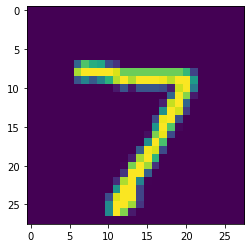

In [24]:
my_number = X_test[0]
plt.imshow(my_number.reshape(28,28))

In [25]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)